# Multiclass Classification using keras:

As we discussed in the previous notebook, the term multiclass simply refers to the dataset containing more than two classes. This means that 3 or more labels are present in the dataset.

Also, we have already discussed how we force the output to be a distribution over the classes using softmax function.

Let's consider an example where we need to classify three different balls: <I>Soccer ball</I>, <I>Basket ball</I> and <I>Volley ball</I>.
Now, we will have inputs say $x1, x2, x3$ and $x4$ which will be fed to the model. Now the model will have to produce three different labels corresponding to each of the classes. Now if we assign label $2$ to soccer ball, label $1$ to basket ball and label $0$ to volley ball. The probability associated with $2$ should be greater than $1$ and probability associated with $1$ should be greater than $0$.
Hence, the requirement arises that:
1. Relative magnitudes must be maintained.
2. All probabilities must add up to 1.

The softmax function satisfies both of the above conditions. The softmax function has the following equation:
$$
        P_m = \frac {e^m}{\sum_{i=1}^n e^i}
$$
This equation refers to the probability of some score $m$ given there are $n$ classes.
So for each score $m, \;e^m$ is divided by the summation of exponential of all scores.
Hence, in case of the ball classififcation the function will take the following form:
$$
        P(score\; m) = \frac{e^m}{e^0 + e^1 + e^2}
$$

Using the above analysis if we calculate the probability of the ball being a soccer ball:
then, 
$$
P(score \;2) = \frac{e^2}{e^0 + e^1 + e^2} = 0.67
$$

Similarly, $P(score\; 1) = 0.24$ and $P(score \;0) = 0.09$.

Now, if we process the inputs through our model which results in output labels of $0$, $1$ and $2$, then we apply the softmax activation.

Before making predictions we need to train the model. Since this is supervised learning model hence we need previously labelled data. Here a problem arises on how to label the data without having any issues of dependency among the labels.
Intuitively, we might feel that we can label the classes as $0$, $1$ and $2$. This is known as <I><b>label encoding</b></I> which gives numerical aliases to different classes. However, this creates inter dependency among the classes such that our algorithm might consider these to be in some kind of order. This doesn't make sense as these classes are mutually exclusive. For this reason we cannot use label encoding.
To label our data we use one-hot label encoding. One-hot label encoding works by creating separate columns for each classes and marks the values using $0$ and $1$. In the above example it can be represented as:

$$\begin{matrix}
    Soccer ball: [1, 0, 0]\\
    Volley ball: [0, 0, 1]
\end{matrix}
$$

### Multiclass Cross Entropy:
It is a way to measure the error in a neural network. A higher cross entropy value means that the model is more or less accurate.
Going to the previous example, lets say we pass inputs for 3 balls through a model, and the corresponding outputs for the balls are as follows:

$$\begin{matrix}
                           &Ball \;1 &   Ball \;2    &Ball\; 3\\
            Actual\; Label: & Soccer\;Ball & Basket\;Ball&  Volley\;Ball\\
    Prediction \;Soccer \;ball  &   0.4   &      0.3      &   0.5\\
    Prediction \;Basket \;ball    &  0.2   &      0.6      &   0.3\\
    Prediction \;Volley \;ball    & 0.4    &     0.1       &  0.2
\end{matrix}
$$

Now, in order to generalise the formula for cross entropy in case of multiclass classification, we will multiply the probability values with the actual one hot encoded labels which in this case would represent the event whether or not the prediction is true.
One-hot encoded labels for the above input are:

$$
\begin{matrix}
       &       Ball \;1  & Ball\; 2  & Ball \;3\\
Soccer \;ball &    1    &   0     &   0\\
Basket \;ball   &  0     &  1    &    0\\
Volley\; ball  &   0    &   0      &  1
\end{matrix}
$$

Taking the elementwise product of the natural log of predictions matrix with the one-hot encoded labels matrix, we would get:
$$
        -(1\times ln(0.4) + 1\times ln(0.6) + 1\times ln(0.2)) = 3.04
$$

### Code Implementation:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
#importing to_categorical to one-hot encode the the output y
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [6]:
#Creating the multiclass dataset
n_pts = 500

#declaring a nested list of centers for the data points to be scattered around
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]

#make_blobs() creates a data points that are centered around a chosen data point
#returns a dataset and labels
#the cluster_std parameter refers to the standard deviation of the data points around there respective centers
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)

print(X[0:10,:])
print(y[0:10])

[[ 0.95219249  1.39076863]
 [ 1.65952714  1.68618744]
 [-0.473863    0.05839169]
 [-1.41959667  0.96995176]
 [ 1.05997353 -0.78014296]
 [-1.60724319 -1.18447497]
 [-0.82564969 -1.1275828 ]
 [-0.11680167 -0.0467727 ]
 [ 0.72626083 -0.10110012]
 [ 0.42796744 -0.36373081]]
[3 3 4 0 2 1 1 4 4 4]


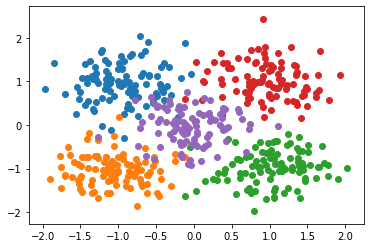

In [7]:
#the data label 0 corresponds to the point for 1st center: [-1, 1]
#similarly, the data label 1 corresponds to the 2nd center: [-1, -1] and the data label 2 corresponds to the 3rd center: [1, -1]
#visualizing the dataset
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [24]:
#one-hot encoding the output labels
print(y)
y_cat = to_categorical(y, 5)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [25]:
model = Sequential()
model.add(Dense(units = 5, input_shape = (2,), activation = 'softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
model.fit(x = X, y = y_cat, verbose = 1, batch_size = 50, epochs = 100)

Epoch 1/100
500/500 [==============================] - 0s 127us/step - loss: 1.5379 - accuracy: 0.2680
Epoch 2/100
500/500 [==============================] - 0s 28us/step - loss: 0.7397 - accuracy: 0.7680
Epoch 3/100
500/500 [==============================] - 0s 22us/step - loss: 0.4761 - accuracy: 0.8880
Epoch 4/100
500/500 [==============================] - 0s 25us/step - loss: 0.3674 - accuracy: 0.9300
Epoch 5/100
500/500 [==============================] - 0s 22us/step - loss: 0.3149 - accuracy: 0.9360
Epoch 6/100
500/500 [==============================] - 0s 21us/step - loss: 0.2861 - accuracy: 0.9480
Epoch 7/100
500/500 [==============================] - 0s 21us/step - loss: 0.2643 - accuracy: 0.9520
Epoch 8/100
500/500 [==============================] - 0s 22us/step - loss: 0.2502 - accuracy: 0.9440
Epoch 9/100
500/500 [==============================] - 0s 19us/step - loss: 0.2390 - accuracy: 0.9420
Epoch 10/100
500/500 [==============================] - 0s 23us/step - loss: 0.22

In [27]:
#declaring function to plot contour zones
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1, 50)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    print(xx_)
    print(yy_)
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

[-2.9706717  -2.84833268 -2.72599367 ...  2.77926206  2.90160108
  3.02394009]
[-2.97723031 -2.97723031 -2.97723031 ...  3.42863169  3.42863169
  3.42863169]


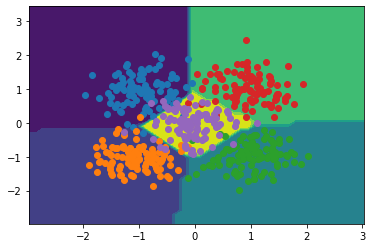

In [28]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

[-2.9706717  -2.84833268 -2.72599367 ...  2.77926206  2.90160108
  3.02394009]
[-2.97723031 -2.97723031 -2.97723031 ...  3.42863169  3.42863169
  3.42863169]
Prediction is: [2]


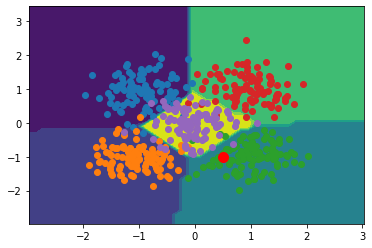

In [29]:
#plotting a point on the decision boundary
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

x = 0.5
y = -1

point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'r')
print("Prediction is:", prediction)